## Imports

In [1]:
from transformers.models.auto.tokenization_auto import AutoTokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import re

In [2]:
tqdm.pandas()

## Tokenizer

In [3]:
model_name = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

## Loading Data

In [4]:
data_dir =  "../Data/"
os.listdir(data_dir)

['train_data.csv', 'test_data.csv']

In [5]:
train_data = pd.read_csv(os.path.join(data_dir, 'train_data.csv'))
test_data = pd.read_csv(os.path.join(data_dir, 'test_data.csv'))

## Processing Text

In [6]:
def process_text(text: str):
    """
    This removes
     - URLs
     - Usernames
     - Punctations (replace them with  ' ')
     - Numbers (replace them with ' ')
     - Multiple Spaces together (replace them with ' ')
    """
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r' www\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'[^\w\s]|[\d]', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text = text.strip().lower().encode('ascii', 'ignore').decode()
    return text

In [7]:
train_data['sentence'] = train_data['sentence'].progress_map(process_text)
test_data['sentence'] = test_data['sentence'].progress_map(process_text)
train_data.head()

100%|██████████| 498/498 [00:00<00:00, 66118.94it/s]


sentence  sentiment
0  awww that s a bummer you shoulda got david car...          0
1  is upset that he can t update his facebook by ...          0
2  i dived many times for the ball managed to sav...          0
3     my whole body feels itchy and like its on fire          0
4  no it s not behaving at all i m mad why am i h...          0

In [8]:
test_data.head()

sentence  sentiment
0  i loooooooovvvvvveee my kindle not that the dx...          1
1  reading my kindle love it lee childs is good read          1
2  ok first assesment of the kindle it fucking rocks          1
3  you ll love your kindle i ve had mine for a fe...          1
4  fair enough but i have the kindle and i think ...          1

## Removing Blanks

In [9]:
train_data = train_data[train_data['sentence'] != ''].reset_index(drop=True)

## Removing neutrals from the test_csv

In [10]:
test_data = test_data[test_data['sentiment'] > -1].reset_index(drop=True)

## Removing Duplicates

In [11]:
print("Before")
print("Duplicates in Train Set:", train_data.duplicated().sum())
print("Duplicates in Test Set:", test_data.duplicated().sum())

print()
# There are a few duplicates in the training_set (About 16.309k)
train_data = train_data[~train_data.duplicated()].reset_index(drop=True)

print("After")
print("Duplicates in Train Set:", train_data.duplicated().sum())
print("Duplicates in Test Set:", test_data.duplicated().sum())

Before
Duplicates in Train Set: 72801
Duplicates in Test Set: 0

After
Duplicates in Train Set: 0
Duplicates in Test Set: 0


## Saving Processed Files

In [12]:
# Deleting, if any
!rm train_data.csv test_data.csv

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

## Exploring the lengths of sentences

In [13]:
train_data['encoded'] = train_data['sentence'].progress_map(tokenizer.encode)
train_data['lengths'] = train_data['encoded'].map(len)

test_data['encoded'] = test_data['sentence'].progress_map(tokenizer.encode)
test_data['lengths'] = test_data['encoded'].map(len)

100%|██████████| 359/359 [00:00<00:00, 10621.26it/s]


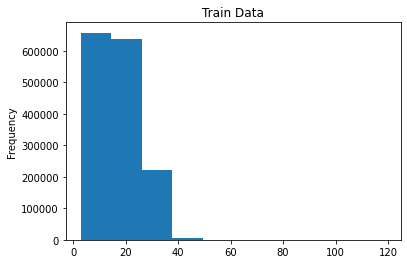

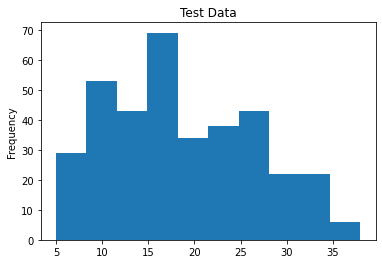

In [14]:
plt.title("Train Data")
train_data['lengths'].plot.hist()
plt.show()

plt.title("Test Data")
test_data['lengths'].plot.hist()
plt.show()

## Counting UNK words

In [15]:
unk_words = sum([tokenizer.unk_token_id in encoded for encoded in train_data['encoded']])
print(f"There are {unk_words} unk words in train")

unk_words = sum([tokenizer.unk_token_id in encoded for encoded in test_data['encoded']])
print(f"There are {unk_words} unk words in test")

There are 0 unk words in train
There are 0 unk words in test


## Cheking label counts

0    767059
1    756916
Name: sentiment, dtype: int64


<AxesSubplot:>

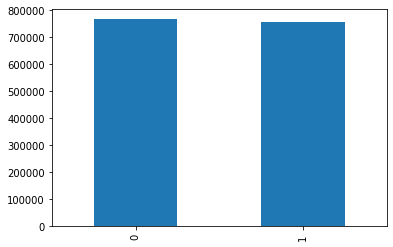

In [16]:
print(train_data['sentiment'].value_counts())
train_data['sentiment'].value_counts().plot.bar()

1    182
0    177
Name: sentiment, dtype: int64


<AxesSubplot:>

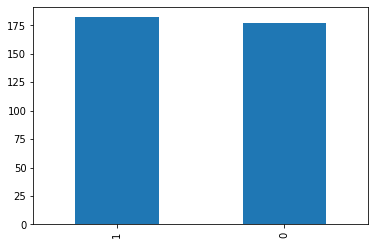

In [17]:
print(test_data['sentiment'].value_counts())
test_data['sentiment'].value_counts().plot.bar()

# Thank You